# My first actual machine learning guided project.
#### Author: Matheus Ferreira

Project available in https://www.tensorflow.org/alpha/tutorials/keras/basic_classification/

In [11]:
pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/7b/14/e4538c2bc3ae9f4ce6f6ce7ef1180da05abc4a617afba798268232b01d0d/tensorflow-1.13.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/2a/22/bd327063dd0bdf9d8d640b3185b760707842160e69df909db3fcaab5b758/grpcio-1.20.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/35/6b/11530768cac581a12952a2aad00e1526b89d242d0b9f59534ef6e6a1752f/astor-0.7.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/90/85/64c82949765cfb246bbdaf5aca2d55f400f792655927a017710a78445def/Keras_Applications-1.0.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c0/bf/0315ef6a9fd3fc2346e85b0ff1f5f83ca17073f2c31ac719ab2e4da0d4a3/Keras_Preprocessing-1.0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bb/48/13f49fc3fa0fdf916aa1419013bb8f2ad09674c275b4046d5ee669a46873/tensorflow_estimator-1.13.0-py2.py3-none-any.whl
  Using cac

In [12]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [44]:
# importing database.
# this is a collection of photos of 10 different types of clothing/acessories.
# conveniently called "fashion"

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
len(train_labels)

60000

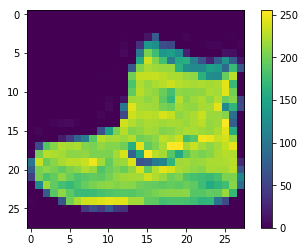

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
#preprocessing data for fitting in the model

train_images = train_images / 255.0

test_images = test_images / 255.0

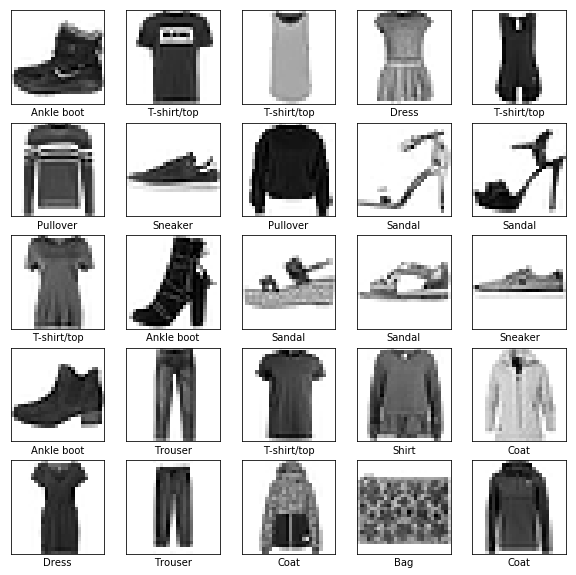

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
#building the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
#compiling model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
#training the neural network

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2808 - acc: 0.8956
Epoch 2/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2703 - acc: 0.9000
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2590 - acc: 0.9032
Epoch 4/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2485 - acc: 0.9076
Epoch 5/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2395 - acc: 0.9111


In [27]:
#testing the model performance

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3556 - acc: 0.8748

Test accuracy: 0.8748


In [28]:
#making predictions about all the images in the dataset.

predictions = model.predict(test_images)

In [33]:
predictions[0]

array([3.3235704e-06, 1.2595519e-10, 1.9990946e-07, 5.3537592e-09,
       4.6287568e-07, 2.7481331e-03, 3.6752783e-05, 2.8402873e-03,
       1.7952441e-07, 9.9437064e-01], dtype=float32)

In [34]:
#most probable label of the image.

np.argmax(predictions[0])

9

In [36]:
#actual label of the image.

test_labels[0]

9

In [29]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

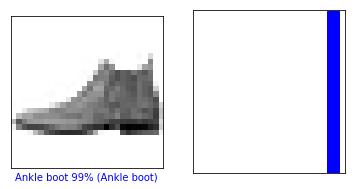

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

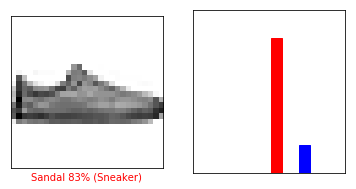

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

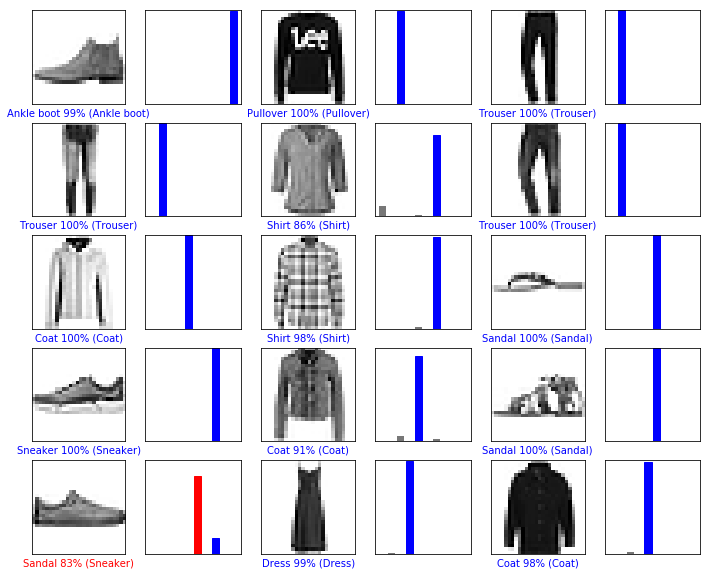

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [37]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [38]:
# Add the image to a batch where it's the only member.
# needs to resize dimensions to fit the model.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [40]:
# predicting label of the single image.

predictions_single = model.predict(img)

print(predictions_single)

[[3.3235733e-06 1.2595519e-10 1.9990985e-07 5.3537690e-09 4.6287568e-07
  2.7481399e-03 3.6752750e-05 2.8402873e-03 1.7952441e-07 9.9437064e-01]]


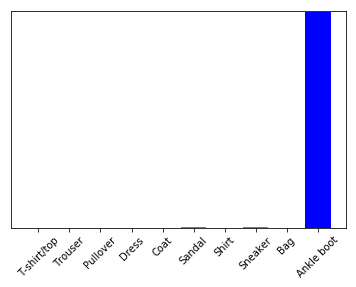

In [42]:
# plotting distribution of probability of the image label, predicted by the model.

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [43]:
np.argmax(predictions_single[0])

9